### Covid 19 Cases and Deaths by Countries and Regions





In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('covid 19 CountryWise.csv')

I collected data on Covid-19 cases and deaths, including their Country, Region, Total Cases, Total Cases per 100k pop, New Cases (7 days), New Cases (24hrs), Total Deaths, Total Deaths per 100k pop, New Deaths (7 days), New Deaths per 100k pop (7 days), and New Deaths (24hrs). 

In [15]:
df.head()

,Country,Region,Total Cases,Total Cases per 100k pop,New Cases (7 days),New Cases per 100k pop (7 days),New Cases (24 hours),Total Deaths,Total Deaths per 100k pop,New Deaths (7 days),New Deaths per 100k pop (7 days),New Deaths (24 hours)
0,United States of America,Americas,94152573,28444.658,416281,125.764,76462,1040506,314.350,2590,0.782,624
1,India,South-East Asia,44516479,3225.822,37843,2.742,6422,528250,38.279,160,0.012,34
2,Brazil,Americas,34544377,16251.633,53446,25.144,10420,685002,322.264,422,0.199,104
3,France,Europe,33766090,51916.394,150781,231.830,36147,151062,232.262,217,0.334,38
4,Germany,Europe,32604993,39204.380,203649,244.868,32168,148728,178.831,50,0.060,8


I looked only at top 15 countries based on number of cases and deaths.

In [16]:
df.describe()

,Total Cases,Total Cases per 100k pop,New Cases (7 days),New Cases per 100k pop (7 days),New Cases (24 hours),Total Deaths,Total Deaths per 100k pop,New Deaths (7 days),New Deaths per 100k pop (7 days),New Deaths (24 hours)
count,2.370000e+02,236.000000,237.000000,236.00000,237.000000,2.370000e+02,236.000000,237.000000,236.000000,237.000000
mean,2.564328e+06,18317.636237,13656.540084,67.63300,2199.046414,2.742087e+04,118.370576,42.312236,0.205814,6.489451
std,8.411666e+06,18337.231057,64795.976248,176.04003,11009.984650,9.772406e+04,123.218458,202.189277,0.516606,43.935779
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.055200e+04,1754.022250,2.000000,0.02200,0.000000,1.530000e+02,14.457750,0.000000,0.000000,0.000000
50%,1.849660e+05,12338.709000,100.000000,7.07250,0.000000,1.604000e+03,79.075500,0.000000,0.000000,0.000000
75%,1.149364e+06,30306.233250,2174.000000,54.90050,104.000000,1.201500e+04,191.180500,8.000000,0.156250,0.000000
max,9.415257e+07,70926.021000,638200.000000,1940.38800,99546.000000,1.040506e+06,655.629000,2590.000000,4.176000,624.000000


In [17]:
grouped_by_region_sum = df.groupby(by=['Region']).sum()
grouped_by_country_sum = df.groupby(by=['Country']).sum()
grouped_by_region_avg = df.groupby(by=['Region']).mean()

I grouped the data by region and country case and death values by deriving their sums and averages.

Text(0.5, 1.0, 'Total Deaths by Region')

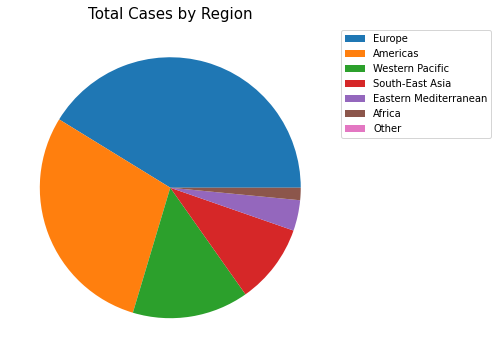

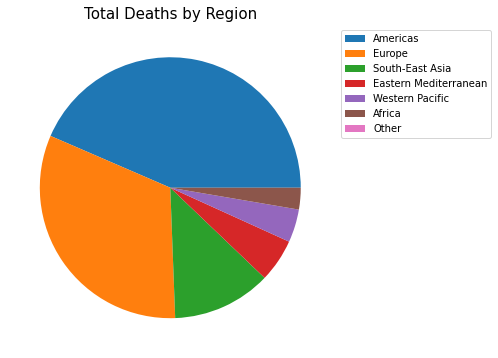

In [18]:
plt.figure(figsize=(10, 6))
plt.pie(grouped_by_region_sum.sort_values('Total Cases', ascending=False)['Total Cases'])
plt.legend(grouped_by_region_sum.sort_values('Total Cases', ascending=False).index, bbox_to_anchor=(1.5, 1), loc="upper right")
plt.title('Total Cases by Region', size=15)

plt.figure(figsize=(20, 6))
plt.pie(grouped_by_region_sum.sort_values('Total Deaths', ascending=False)['Total Deaths'])
plt.legend(grouped_by_region_sum.sort_values('Total Deaths', ascending=False).index, bbox_to_anchor=(1.5, 1), loc="upper right")
plt.title('Total Deaths by Region', size=15)

These pie charts show the distribution of Total Cases and Total Deaths. As shown, Europe and America have the most cases and deaths. Total case numbers were higher in Europe, however, total deaths were higher in the Americas. Higher case numbers were not directly linked to more death rates based on these figures. 

Text(0.5, 0, 'Countries')

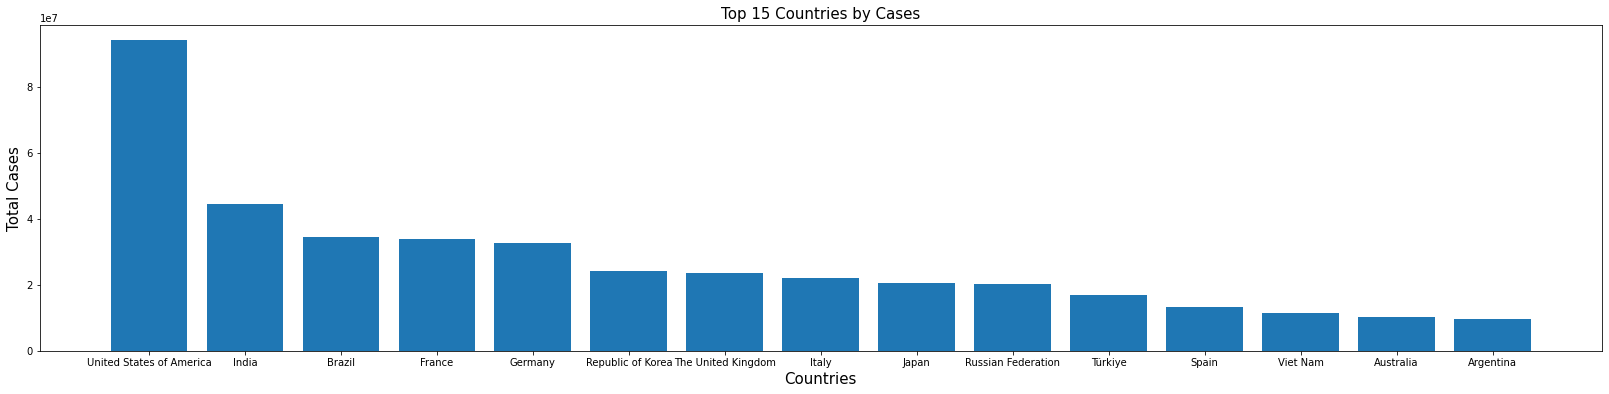

In [22]:
plt.figure(figsize=(28, 6))
plt.bar(grouped_by_country_sum.sort_values('Total Cases', ascending=False).index[0:15], grouped_by_country_sum.sort_values('Total Cases', ascending=False)['Total Cases'][0:15])
plt.title('Top 15 Countries by Cases', size=15)
plt.ylabel('Total Cases', size=15)
plt.xlabel('Countries', size=15)

The dataset included hundreds of countries, I focused on the top 15 for our range. Looking at the countries, I found that the United States by far had the highest number of cases, nearly doubling India's infection rates, the country with the second most cases. 

Text(0, 0.5, 'Total Deaths')

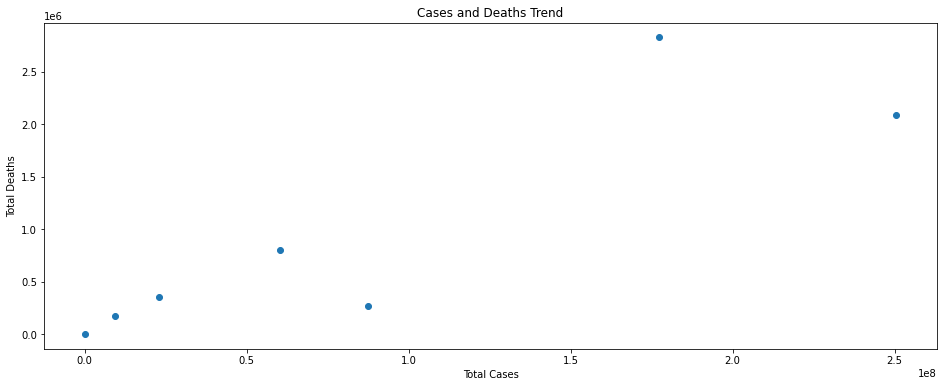

In [20]:
plt.figure(figsize=(16, 6))
plt.scatter(grouped_by_region_sum['Total Cases'], grouped_by_region_sum['Total Deaths'])
plt.title('Cases and Deaths Trend')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')

This plot shows the trend between cases and deaths. We found a positive correlation between cases and deaths. Generally more cases result in a higher number of deaths. I would like to further examine how the trend specifically differs by countries or regions. 

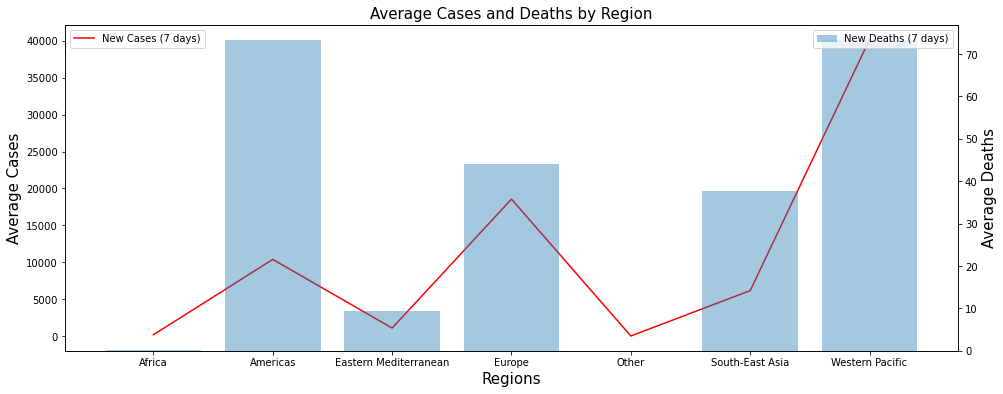

In [21]:
fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.plot(grouped_by_region_avg['New Cases (7 days)'], color='red')
ax1.set_ylabel('Average Cases', size=15)
ax1.set_xlabel('Regions', size=15)
ax1.legend(['New Cases (7 days)'], loc="upper left")

ax2 = ax1.twinx()

ax2.bar(grouped_by_region_avg['New Deaths (7 days)'].index, grouped_by_region_avg['New Deaths (7 days)'], alpha=0.4)
ax2.set_ylabel('Average Deaths', size=15)
ax2.legend(['New Deaths (7 days)'], loc="upper right")
plt.title('Average Cases and Deaths by Region', size=15)
plt.show()

In order to examine the cases and deaths by region, I took the average values of the total cases and the total deaths and examined them by region. To get a better estimate, I further narrowed down the range to the most recent numbers from the last 7 days. This helped me determine the correlation between the cases and deaths by region.   